## Single neuron neural network with sigmoid activation  function
Following represents the exam1 and exam2 score of various students. Based on some criteria, students are either admitted or rejected. We do  not know the criteria. All we have is the data from various students who were admitted/rejected. Using single neuron network, determine the decision boundary.

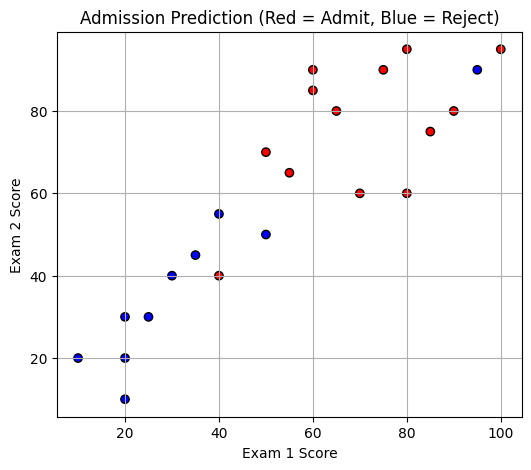

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

import os
import random

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Input features: [Exam 1 score, Exam 2 score]
X = np.array([
    [30, 40], [50, 50], [70, 60], [90, 80], [85, 75], [25, 30], [60, 90],
    [35, 45], [80, 95], [20, 20], [40, 55], [50, 70], [60, 85], [80, 60],
    [75, 90], [65, 80], [55, 65], [40, 40], [95, 90], [100, 95], [20, 30],
    [10, 20], [20, 10]
], dtype=np.float32)

y = np.array([ # 0 means reject, 1 means admit
    [0], [0], [1], [1], [1], [0], [1],
    [0], [1], [0], [0], [1], [1], [1],
    [1], [1], [1], [1], [0], [1], [0],
    [0], [0]
], dtype=np.float32)

# Plot the data points
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolor='k', label='True')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Admission Prediction (Red = Admit, Blue = Reject)")
# Add legend and grid
plt.grid(True)

# Show the plot
plt.show()

## observation
It appears that students whose score in  exam1 and exam2 were higher than 50, then very likely they would get admitted, else rejected

In [3]:
# Build model: 1 neuron with sigmoid activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

# Compile
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

weights, bias = model.layers[0].get_weights() # randomly assigned
print(f"Initial weights: \n{weights}")
print(f"Initial bias: {bias}")

# Train
model.fit(X, y, epochs=400, verbose=0) # 400 epoch gave 82% accuracy



Initial weights: 
[[ 1.3552576 ]
 [-0.05086112]]
Initial bias: [0.]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Accuracy: 91.30%


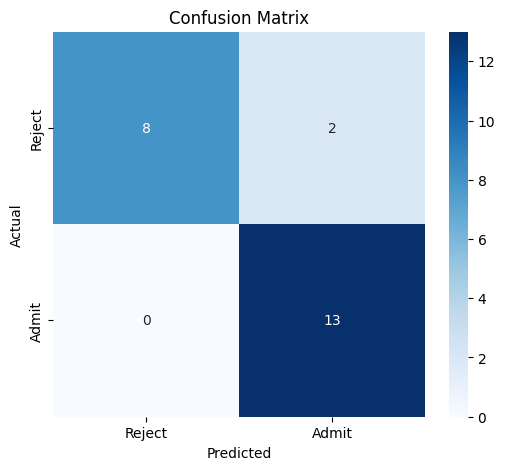

In [4]:
# Predict probabilities
preds = model.predict(X)

# Convert probabilities to binary class predictions (0 or 1)
predicted_class = (preds >= 0.5).astype(int)

# Check accuracy
accuracy = accuracy_score(y, predicted_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y, predicted_class)

# Plot Confusion Matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Reject', 'Admit'], yticklabels=['Reject', 'Admit'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [5]:
# Display Actual vs Predicted
print("\nActual vs Predicted:\n")
print(f"{'Input':<20} {'Actual':<7} {'Predicted Prob':<15} {'Predicted Class'}")
print("-" * 60)
for i in range(len(X)):
    input_vals = X[i]
    actual = int(y[i][0])
    prob = preds[i][0]
    predicted_class = int(prob >= 0.5)
    print(f"{str(input_vals):<20} {actual:<7} {prob:<15.4f} {predicted_class}")




Actual vs Predicted:

Input                Actual  Predicted Prob  Predicted Class
------------------------------------------------------------
[30. 40.]            0       0.3534          0
[50. 50.]            0       0.6460          1
[70. 60.]            1       0.8590          1
[90. 80.]            1       0.9424          1
[85. 75.]            1       0.9275          1
[25. 30.]            0       0.3224          0
[60. 90.]            1       0.6096          1
[35. 45.]            0       0.4117          0
[80. 95.]            1       0.8531          1
[20. 20.]            0       0.2928          0
[40. 55.]            0       0.4457          0
[50. 70.]            1       0.5419          1
[60. 85.]            1       0.6351          1
[80. 60.]            1       0.9254          1
[75. 90.]            1       0.8194          1
[65. 80.]            1       0.7346          1
[55. 65.]            1       0.6529          1
[40. 40.]            1       0.5267          1
[95. 90.]

Final weights: 
[[ 0.07110604]
 [-0.02166895]]
Final bias: [-1.8704427]


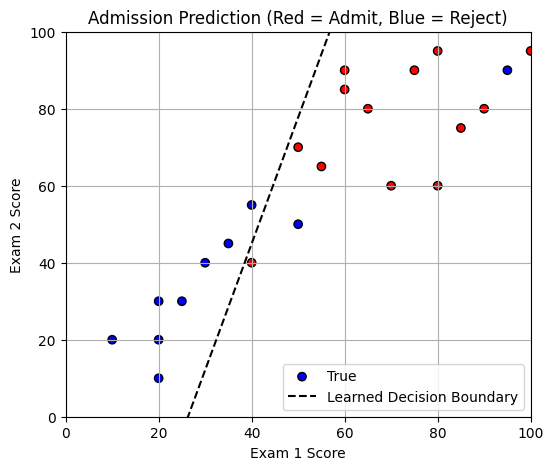

In [7]:
# Get weights and bias from the trained model
weights, bias = model.layers[0].get_weights()
print(f"Final weights: \n{weights}")
print(f"Final bias: {bias}")
w1, w2 = weights.flatten()

# Plot the data points
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolor='k', label='True')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Admission Prediction (Red = Admit, Blue = Reject)")

# Create x1 values in range 0 to 100
x1_range = np.linspace(0, 100, 100)
x2_boundary = - (w1 * x1_range + bias) / w2

# Plot the decision boundary
plt.plot(x1_range, x2_boundary, 'k--', label='Learned Decision Boundary')

# Set axis limits to 0-100 for both x1 and x2
plt.xlim(0, 100)
plt.ylim(0, 100)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
